# Exploratory Data Analysis
In this notebook, we will inspect our dataset, describing and summarizing its important aspects. The raw dataset for this study was obtained from the research conducted by Rossetti et al. (2019), where they utilized crowdsourcing through Place Pulse 2.0 to generate perception values for cities. https://centerforcollectivelearning.org/urbanperception

Our dataset combines the aforementioned data with geospatial information from the administrative political division provided by ArcGIS Hub, for the city of Santiago, Chile, in order to determine the division to which each data point belongs. https://hub.arcgis.com/datasets/e230808f44694629bf2748c1848c764d

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

## Loading the data into a pandas data frame

In [127]:
df = pd.read_csv('Data/dataset_santiago_ismt.csv')
df.head()

,latlong,beautiful,boring,depressing,lively,safe,wealthy,lat,lon,comuna,node_id,division,prom_ismt,hogares,hog_40pct,pct_hog40p,AVE_GSE,uf2018
0,"-33.323944,-70.51263428391168",-0.306948,1.565049,0.572029,-1.137733,-0.120456,-0.561887,-33.323944,-70.512634,Lo Barnechea,1396118148,Lo Barnechea,0.915742,1087.0,10,0.0092,ABC1,80.723424
1,"-33.323944,-70.5127291",-0.421388,0.309495,0.368965,-0.098733,-0.103042,-0.162294,-33.323944,-70.512729,Lo Barnechea,1396118148,Lo Barnechea,0.915742,1087.0,10,0.0092,ABC1,80.723424
2,"-33.323944,-70.51298714285714",0.116505,0.164284,-0.110312,0.063860,0.391172,0.226372,-33.323944,-70.512987,Lo Barnechea,1396115711,Lo Barnechea,0.915742,1087.0,10,0.0092,ABC1,80.723424
3,"-33.323944,-70.51343609999999",-0.159113,-0.500987,-0.213503,0.635165,0.300856,0.453708,-33.323944,-70.513436,Lo Barnechea,9644543305,Lo Barnechea,0.915742,1087.0,10,0.0092,ABC1,80.723424
4,"-33.323944,-70.51379769565217",-1.226162,1.176751,1.462015,-0.842954,-0.946355,-0.936168,-33.323944,-70.513798,Lo Barnechea,1735562917,Lo Barnechea,0.915742,1087.0,10,0.0092,ABC1,80.723424


## Checking data types

In [3]:
df.dtypes

latlong        object
beautiful     float64
boring        float64
depressing    float64
lively        float64
safe          float64
wealthy       float64
lat           float64
lon           float64
node_id         int64
division       object
prom_ismt     float64
dtype: object

## Check for duplicates
We can see there are not duplicates rows in the dataset

In [3]:
print(f'Length original dataset: {len(df)}')
print(f'Length dataset filtered duplicates: {len(df.drop_duplicates())}')

Length original dataset: 114189
Length dataset filtered duplicates: 114189


## Drop missing values

In [4]:
print(df.isnull().sum())

latlong       0
beautiful     0
boring        0
depressing    0
lively        0
safe          0
wealthy       0
lat           0
lon           0
comuna        0
node_id       0
division      0
prom_ismt     0
hogares       0
hog_40pct     0
pct_hog40p    0
AVE_GSE       0
uf2018        0
dtype: int64


## Outliers
An outlier is a data point or a set of points that differ significantly from the rest of the data. These points can sometimes have unusually high or low values. It is commonly recommended to identify and address outliers using techniques such as the IQR (Interquartile Range) score.

These values can be visualized using boxplots, wherein the outliers are represented as data points located at the extremes of each feature's boxplot. We are not currently removing the outliers at the time this notebook is being written.

In [47]:
df

,latlong,beautiful,boring,depressing,lively,safe,wealthy,lat,lon,comuna,node_id,division,prom_ismt,hogares,hog_40pct,pct_hog40p,AVE_GSE,uf2018
0,"-33.323944,-70.51263428391168",-0.306948,1.565049,0.572029,-1.137733,-0.120456,-0.561887,-33.323944,-70.512634,Lo Barnechea,1396118148,Lo Barnechea,0.915742,1087.0,10,0.009200,ABC1,80.723424
1,"-33.323944,-70.5127291",-0.421388,0.309495,0.368965,-0.098733,-0.103042,-0.162294,-33.323944,-70.512729,Lo Barnechea,1396118148,Lo Barnechea,0.915742,1087.0,10,0.009200,ABC1,80.723424
2,"-33.323944,-70.51298714285714",0.116505,0.164284,-0.110312,0.063860,0.391172,0.226372,-33.323944,-70.512987,Lo Barnechea,1396115711,Lo Barnechea,0.915742,1087.0,10,0.009200,ABC1,80.723424
3,"-33.323944,-70.51343609999999",-0.159113,-0.500987,-0.213503,0.635165,0.300856,0.453708,-33.323944,-70.513436,Lo Barnechea,9644543305,Lo Barnechea,0.915742,1087.0,10,0.009200,ABC1,80.723424
4,"-33.323944,-70.51379769565217",-1.226162,1.176751,1.462015,-0.842954,-0.946355,-0.936168,-33.323944,-70.513798,Lo Barnechea,1735562917,Lo Barnechea,0.915742,1087.0,10,0.009200,ABC1,80.723424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114184,"-33.67434854258675,-70.66824507886436",1.391164,-0.480694,-1.135939,0.324142,0.884354,0.961162,-33.674349,-70.668245,Buin,8961495191,Buin,0.731159,643.0,473,0.735614,D,18.538494
114185,"-33.6754716340694,-70.66824507886436",0.051756,-0.266517,-0.026096,0.383208,0.358507,0.183468,-33.675472,-70.668245,Buin,8904499951,Buin,0.731159,643.0,473,0.735614,D,18.538494
114186,"-33.67659472555205,-70.66824507886436",-0.041601,-0.957453,-0.226881,0.906073,0.253932,0.104719,-33.676595,-70.668245,Buin,314190696,Buin,0.731159,643.0,473,0.735614,D,18.538494
114187,"-33.6777178170347,-70.6694800851735",1.657702,0.324817,-1.200881,-0.120452,1.263557,1.156163,-33.677718,-70.669480,Buin,1320611525,Buin,0.731159,643.0,473,0.735614,D,18.538494


c:\Users\Lenovo\OneDrive - Universidad Católica de Chile\Documentos\Tesis_Master\tesisenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


AttributeError: 'NoneType' object has no attribute 'set_yticklabels'

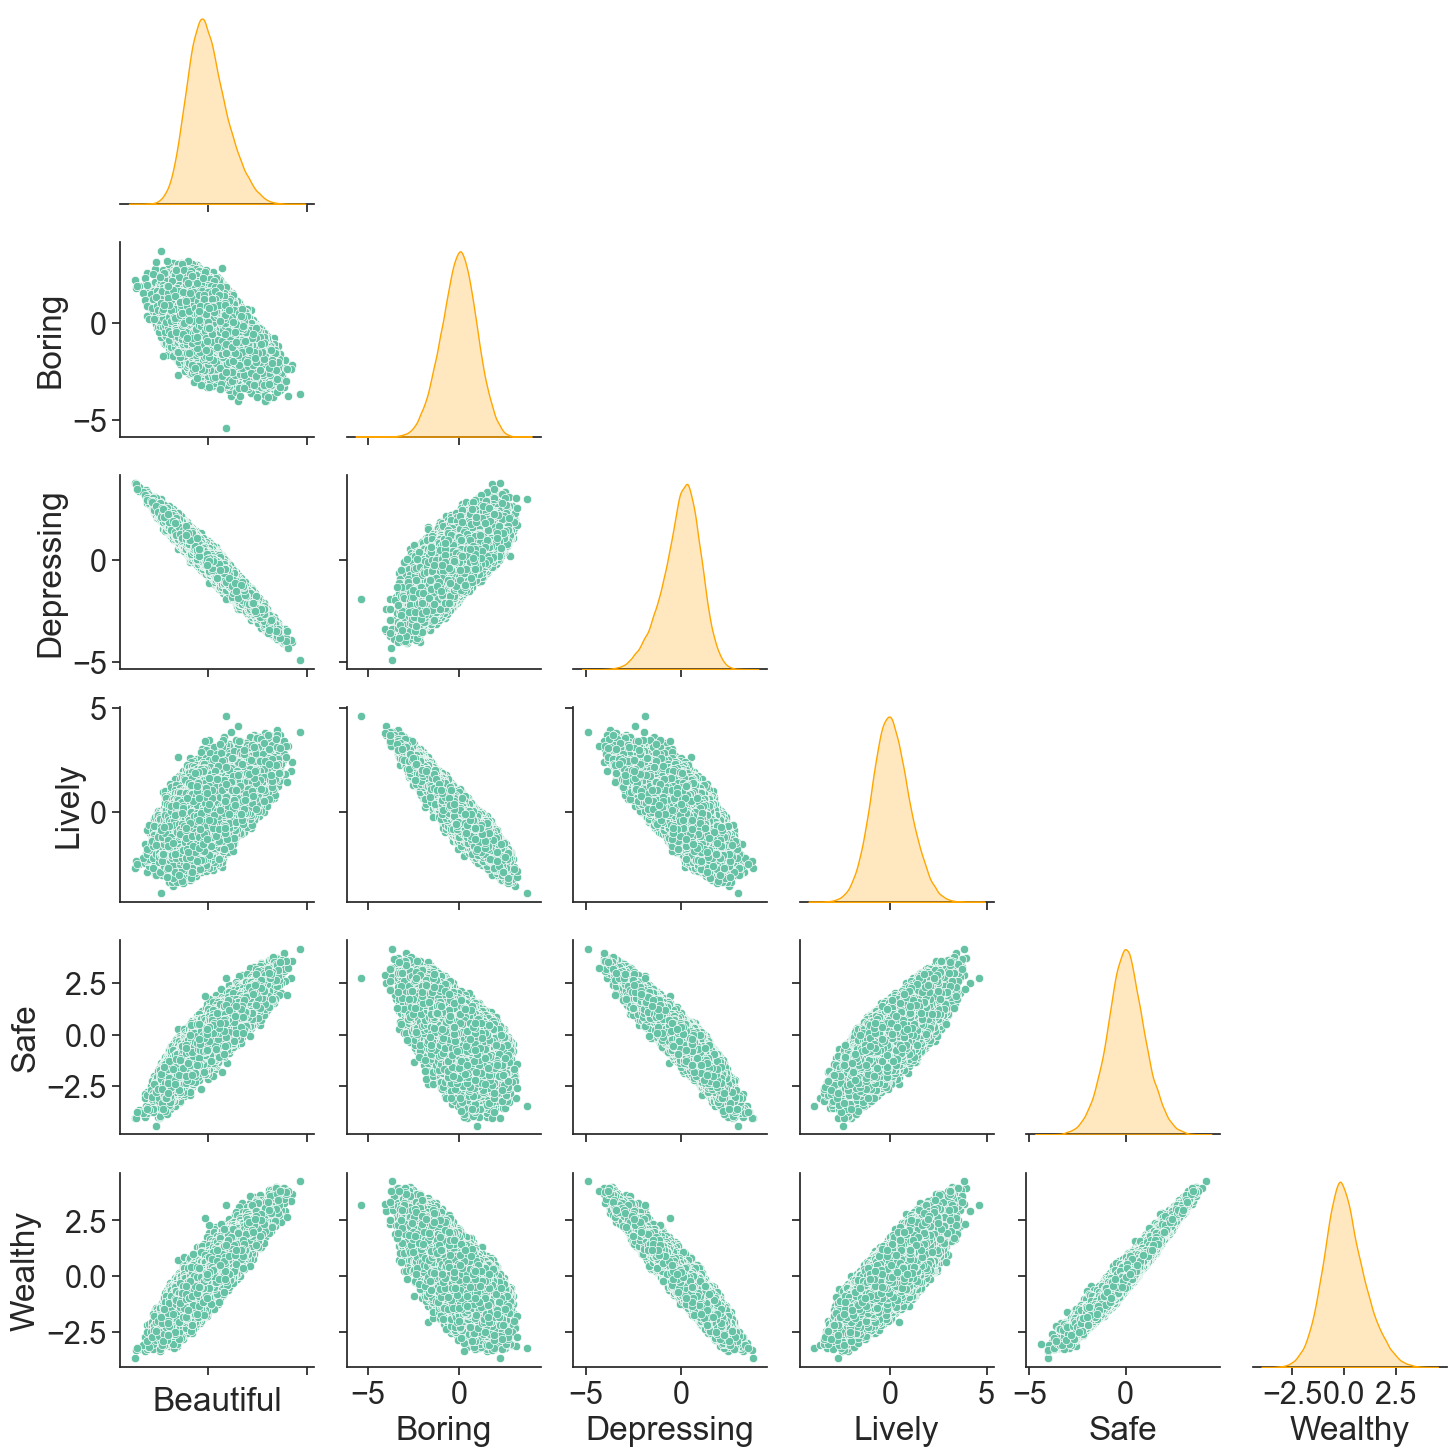

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir los nombres de las columnas a mayúsculas
df_correlation = df.copy()
df_correlation.columns = df_correlation.columns.str.capitalize()

# Configurar el estilo de Seaborn y el tamaño de la fuente
sns.set(style="ticks", palette="Set2", font_scale=2)  # Ajusta el tamaño de la fuente aquí

# Crear el pairplot con solo las columnas especificadas
pairplot = sns.pairplot(df_correlation.iloc[:, [1,2,3,4,5,6]],
                        diag_kws={'color': 'orange'},
                        diag_kind='kde',
                        corner=True,
                        )

# Eliminar los valores numéricos en los ejes de los subgráficos
for ax in pairplot.axes.flatten():
    ax.set_yticklabels([])
    ax.set_xticklabels([])

# Ajustar los títulos y etiquetas de los ejes
#plt.suptitle("Pairplot de las características seleccionadas", y=1.02)
plt.xlabel("Valor")
plt.ylabel("Valor")

# Mostrar el gráfico
plt.savefig('Img/pairplot.png')
plt.show()


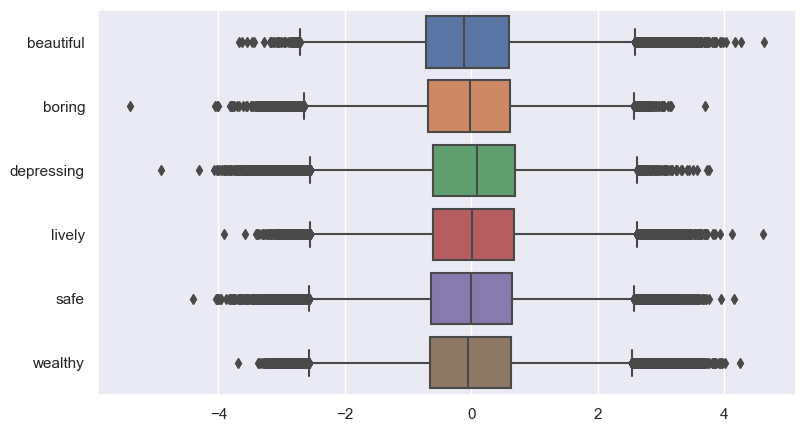

In [5]:
plt.figure(figsize=(9,5))
boxplot = sns.boxplot(data=df.iloc[:, [1,2,3,4,5,6]], orient="h")
plt.show()

# Visualize Divisions Features
To better understand how the values of each feature are distributed in Santiago, the data is grouped by division, and the average of each feature is obtained. Then, we visualize the results in a bar graph.

In [6]:
df_com = df.groupby("division")[["beautiful", "boring", "depressing", "lively", "safe", "wealthy",
                                 "prom_ismt", "hogares", "hog_40pct", "pct_hog40p"]].mean().reset_index()
df_com.head(5)

,division,beautiful,boring,depressing,lively,safe,wealthy,prom_ismt,hogares,hog_40pct,pct_hog40p
0,Buin,0.391340,0.196812,-0.254279,-0.062516,0.412430,0.261089,0.731159,643.000000,473.000000,0.735614
1,Calera de Tango,0.429676,0.191074,-0.318868,-0.119917,0.325543,0.253583,0.729073,637.120743,387.377709,0.610995
2,Cerrillos,-0.297461,0.484187,0.364713,-0.449899,-0.312336,-0.343119,0.786466,1049.762291,500.802887,0.478402
3,Cerro Navia,-0.048208,-0.171137,-0.001591,0.105822,-0.041997,-0.076476,0.742473,989.201677,681.637574,0.689855
4,Colina,-0.762115,1.428280,0.952300,-1.133956,-0.594475,-0.860659,0.919429,1012.000000,7.000000,0.006917


In [7]:
import geopandas as gpd
df_comunas = gpd.read_file('Data/Comunas/COMUNAS_2020.shp')


In [123]:
df.describe()

,beautiful,boring,depressing,lively,safe,wealthy,lat,lon,node_id,prom_ismt,hogares,hog_40pct,pct_hog40p,uf2018
count,114189.000000,114189.000000,114189.000000,114189.000000,114189.000000,114189.000000,114189.000000,114189.000000,1.141890e+05,114189.000000,114189.000000,114189.000000,114189.000000,114189.000000
mean,-0.014916,-0.050635,-0.002718,0.050428,0.006203,0.012059,-33.479251,-70.646346,3.871175e+09,0.808869,1096.495932,396.588209,0.386799,28.935193
std,0.993120,0.969141,0.992675,0.972056,0.997434,0.990899,0.075523,0.077372,3.468361e+09,0.062463,382.799049,276.240147,0.243413,19.152346
min,-3.680865,-5.402144,-4.911374,-3.905006,-4.408994,-3.698848,-33.678841,-70.848556,3.861390e+05,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.718254,-0.690815,-0.606835,-0.608446,-0.636532,-0.652528,-33.537331,-70.705295,4.342807e+08,0.761962,866.000000,140.000000,0.142327,16.507354
50%,-0.109070,-0.020765,0.088424,0.016710,-0.001102,-0.056494,-33.475949,-70.644939,2.481099e+09,0.800197,1113.000000,378.000000,0.401269,21.966968
75%,0.605957,0.614368,0.686736,0.682457,0.646758,0.624050,-33.418852,-70.581795,6.507331e+09,0.855764,1342.000000,591.000000,0.600634,32.886520
max,4.634500,3.694056,3.769558,4.618434,4.164722,4.255733,-33.323944,-70.458294,1.008103e+10,0.920253,2910.000000,1243.000000,1.000000,101.527869


In [129]:
def plot_ismt(data, target, target2, cmap='BuPu', normalize=False, model_name=None):
    # Listas de latitudes y longitudes (asegúrate de que tengan la misma longitud)
    latitudes = data.lat
    longitudes = data.lon

    # Obtener el rango de valores reales
    real = data[target]
    real = (real - real.min()) / (real.max() - real.min())

    # Definir la figura y los subplots
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))

    # Configurar el mapa de colores
    cmap = plt.get_cmap(cmap)

    # Graficar el primer subplot
    sc1 = axs[0].scatter(longitudes, latitudes, c=real, cmap=cmap, marker='o', s=1)
    axs[0].set_title('ISMT values')
    

    # Añadir una única barra de colores común para ambos subplots
    #cbar = plt.colorbar(sc1, ax=axs[0], label='Values', orientation='vertical')

    # Graficar el segundo subplot
    # Puedes agregar aquí tu segundo gráfico utilizando data2 y target2 si es necesario
    real2 = data[target2]
    sc2 = axs[1].scatter(longitudes, latitudes, c=real2, cmap=cmap, marker='o', s=3)
    axs[1].set_title('ISMT values')

    # Ajustar el diseño y mostrar los gráficos
    plt.tight_layout()
    plt.show()

In [183]:
def plot_ismt(data, target, cmap='BuPu', normalize=False, model_name=None):
    #data = data.to('cpu')

    # Listas de latitudes y longitudes (asegúrate de que tengan la misma longitud)
    latitudes = data.lat
    longitudes = data.lon

    plt.figure(figsize=(10, 10))
    #plt.gca().set_facecolor('black')  # Establecer el fondo negro
    real = data[target]

    cmap = plt.get_cmap(cmap)
    sc2 = plt.scatter(longitudes, latitudes, c=real, cmap=cmap, marker='o', s=3)
    plt.xticks([])
    plt.yticks([])
    plt.title('Safe perpectual values')
   

    # Añadir una única barra de colores común para ambos subplots
    #cbar = plt.colorbar(sc2, label='Values', orientation='vertical')
    plt.savefig('Img/safe_example.png')

    plt.tight_layout()
    plt.show()

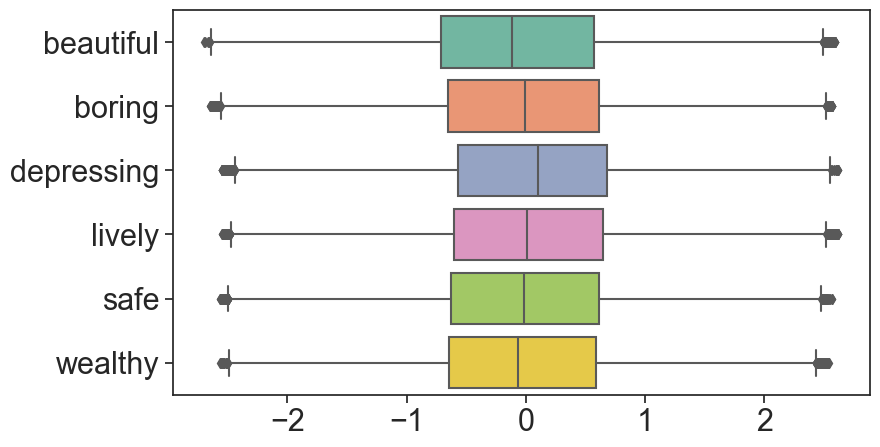

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula los cuartiles
Q1 = df.iloc[:, [1,2,3,4,5,6]].quantile(0.25)
Q3 = df.iloc[:, [1,2,3,4,5,6]].quantile(0.75)
IQR = Q3 - Q1

# Define el rango intercuartílico para identificar los outliers
filtro_outliers = (df.iloc[:, [1,2,3,4,5,6]] < (Q1 - 1.5 * IQR)) | (df.iloc[:, [1,2,3,4,5,6]] > (Q3 + 1.5 * IQR))

# Aplica el filtro y elimina los outliers
df_sin_outliers = df[~filtro_outliers.any(axis=1)]

# Grafica el boxplot sin outliers
plt.figure(figsize=(9,5))
boxplot_sin_outliers = sns.boxplot(data=df_sin_outliers.iloc[:, [1,2,3,4,5,6]], orient="h")
plt.show()


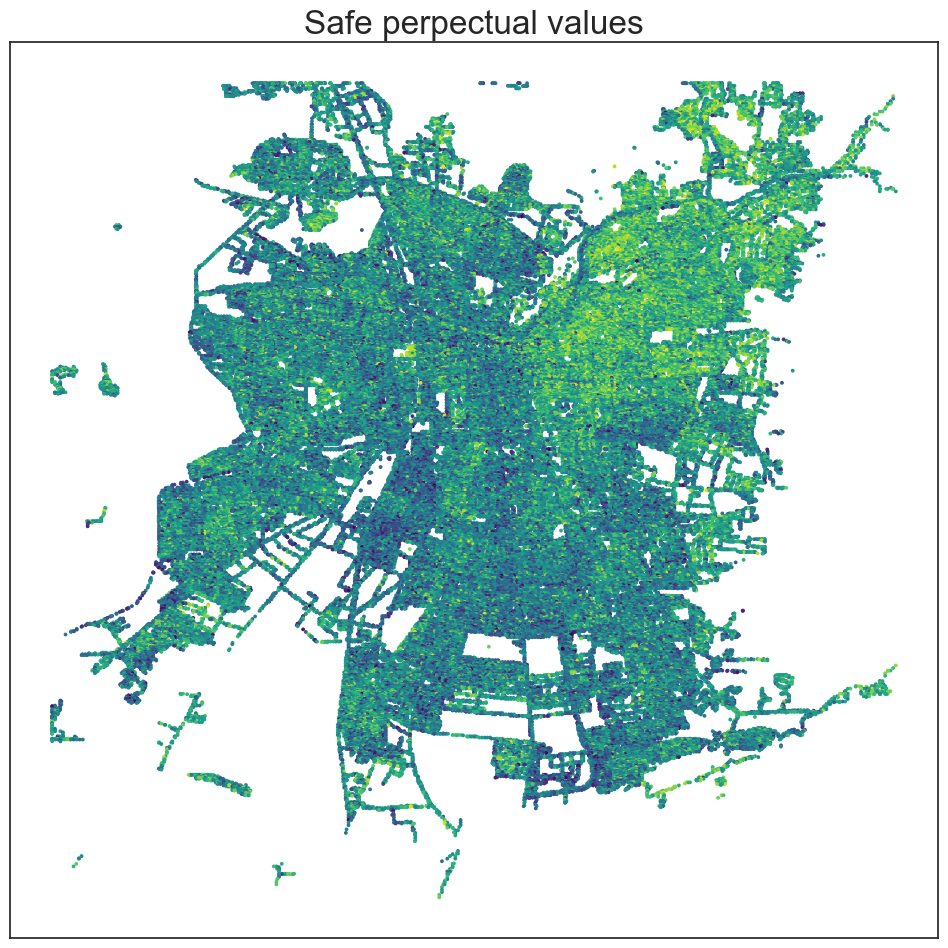

In [184]:
plot_ismt(df_sin_outliers, 'safe', cmap='viridis')

In [153]:
plot_ismt(df_sin_outliers, 'wealthy', 'uf2018', cmap='viridis')

AttributeError: module 'seaborn' has no attribute 'scatter'

In [21]:
santiago_division = df_comunas[df_comunas.CUT_REG == '13']
df_merge = df_com.merge(santiago_division[['geometry', 'COMUNA']], left_on='division', right_on='COMUNA')
#df_merge = df_merge.drop(['geometry_x', 'geometry_y', 'division'], axis=1)
#df_merge = df_merge.rename({'COMUNA':'division'}, axis=1)
df_merge.head()

,division,beautiful,boring,depressing,lively,safe,wealthy,prom_ismt,hogares,hog_40pct,pct_hog40p,geometry,COMUNA
0,Buin,0.391340,0.196812,-0.254279,-0.062516,0.412430,0.261089,0.731159,643.000000,473.000000,0.735614,"POLYGON ((-70.61396 -33.73862, -70.61505 -33.7...",Buin
1,Calera de Tango,0.429676,0.191074,-0.318868,-0.119917,0.325543,0.253583,0.729073,637.120743,387.377709,0.610995,"POLYGON ((-70.77075 -33.57105, -70.76915 -33.5...",Calera de Tango
2,Cerrillos,-0.297461,0.484187,0.364713,-0.449899,-0.312336,-0.343119,0.786466,1049.762291,500.802887,0.478402,"POLYGON ((-70.71241 -33.48121, -70.71227 -33.4...",Cerrillos
3,Cerro Navia,-0.048208,-0.171137,-0.001591,0.105822,-0.041997,-0.076476,0.742473,989.201677,681.637574,0.689855,"POLYGON ((-70.71922 -33.41332, -70.71891 -33.4...",Cerro Navia
4,Colina,-0.762115,1.428280,0.952300,-1.133956,-0.594475,-0.860659,0.919429,1012.000000,7.000000,0.006917,"POLYGON ((-70.42299 -33.02447, -70.42285 -33.0...",Colina


In [31]:
df_merge = santiago_division.merge(df_com, right_on='division', left_on='COMUNA')


<Axes: >

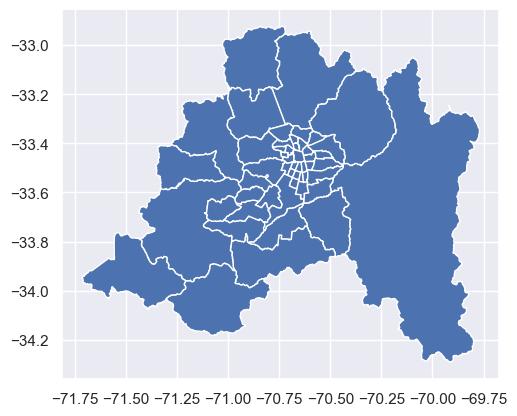

In [34]:
santiago_division.plot()

<Axes: >

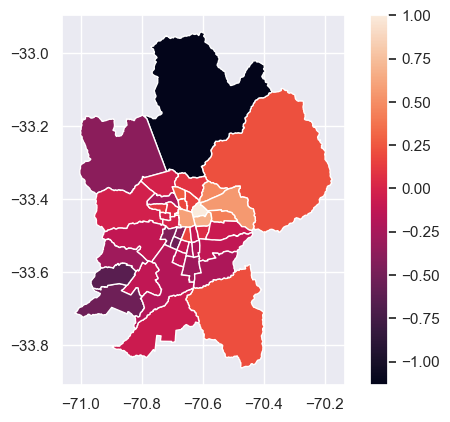

In [45]:
df_merge[df_merge.COMUNA != 'San José de Maipo'].plot(column='lively', legend=True)

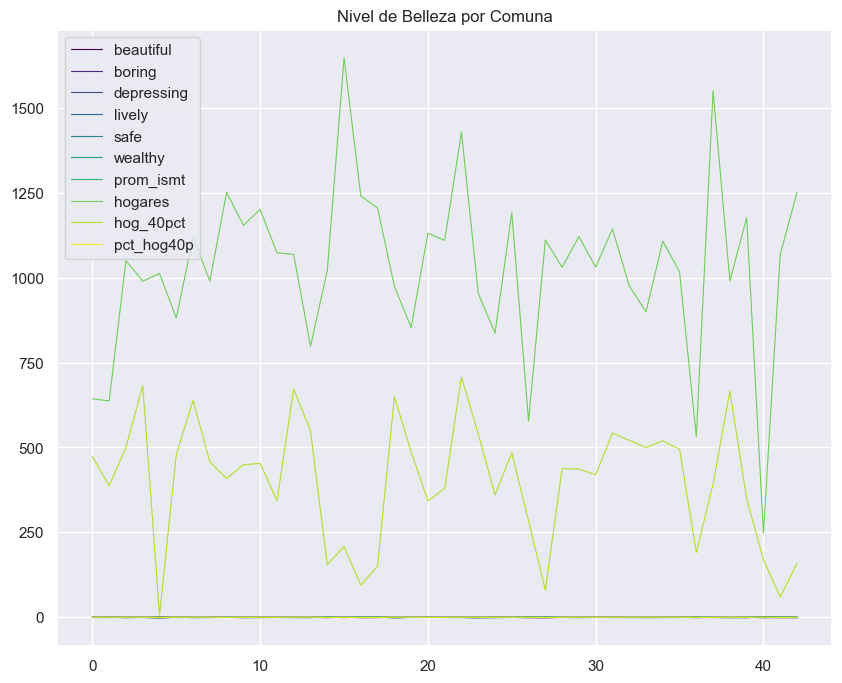

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_merge.plot(column='beautiful', cmap='viridis', linewidth=0.8, ax=ax, legend=True)
ax.set_title('Nivel de Belleza por Comuna')
plt.show()

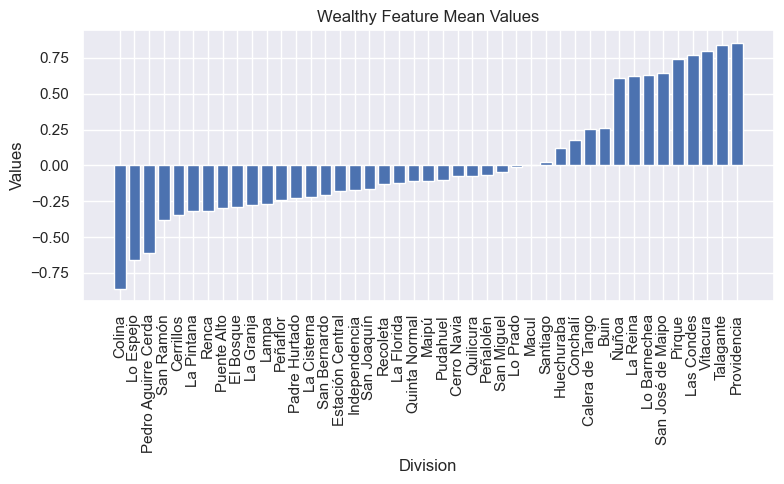

In [5]:
def plot_features_mean(feature_name, save_img=True):
  df_aux = df_com.sort_values(by=feature_name)
  x = df_aux["division"]
  y = df_aux[feature_name]
  plt.figure(figsize=(8,5))
  plt.bar(x, y)
  plt.xticks(rotation = 90)
  plt.title(feature_name.capitalize() + ' Feature Mean Values')
  plt.xlabel("Division")
  plt.ylabel("Values")
  
  plt.tight_layout()
  if save_img:
      plt.savefig('Img/' + feature_name + ".png")
  plt.show()

plot_features_mean("wealthy")

## Heatmap
In order to find the relationship between the features we heat maps, a plot to visualize feature dependences.

Notable correlations include a strong positive relationship between "beautiful" and attributes like "safe," "wealthy," and "lively." Conversely, "boring" shows a strong negative correlation with "lively" and moderate positive correlation with "depressing."

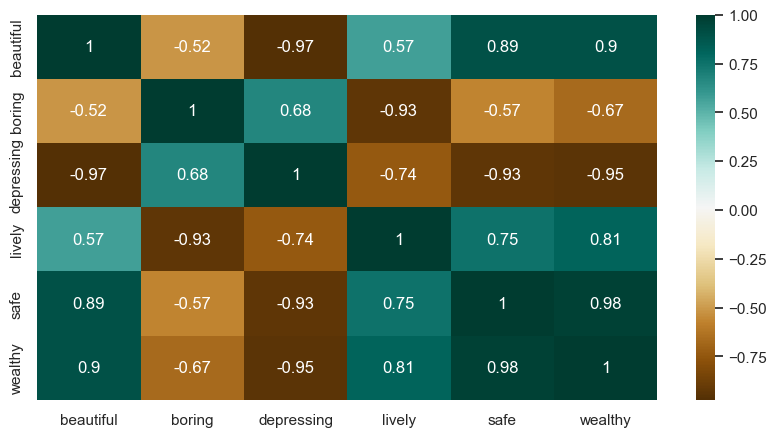

In [18]:
plt.figure(figsize=(10,5))
c= df.iloc[:, [1,2,3,4,5,6]].corr()
sns.heatmap(c,cmap="BrBG",annot=True)
plt.savefig('Img/correlation.png')

## ISMT Features

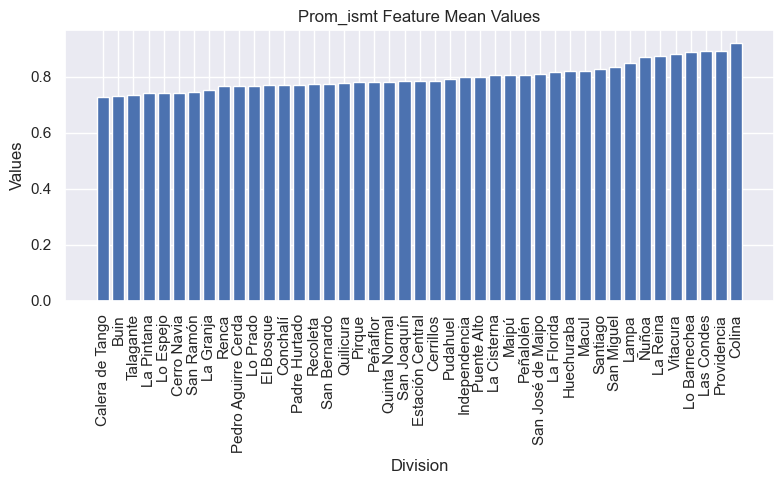

In [19]:
def plot_features_mean(feature_name, save_img=True):
  df_aux = df_com.sort_values(by=feature_name)
  x = df_aux["division"]
  y = df_aux[feature_name]
  plt.figure(figsize=(8,5))
  plt.bar(x, y)
  plt.xticks(rotation = 90)
  plt.title(feature_name.capitalize() + ' Feature Mean Values')
  plt.xlabel("Division")
  plt.ylabel("Values")
  
  plt.tight_layout()
  if save_img:
      plt.savefig('Img/ISMT.png')
  plt.show()

plot_features_mean("prom_ismt", save_img=False)

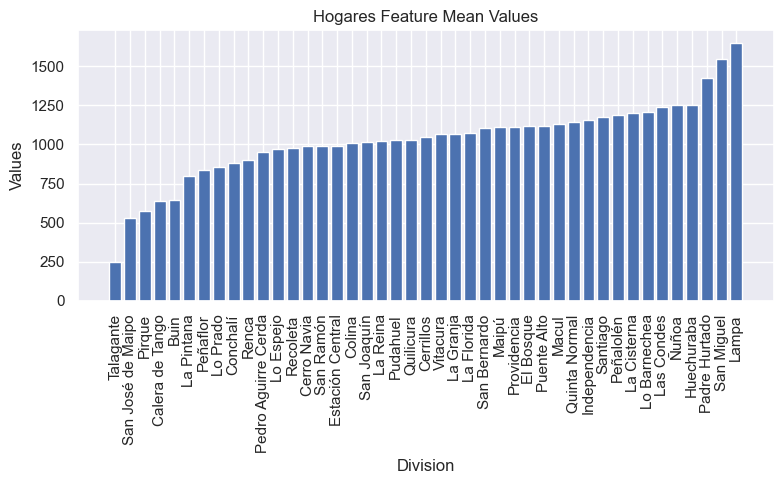

In [20]:
plot_features_mean("hogares", save_img=False)

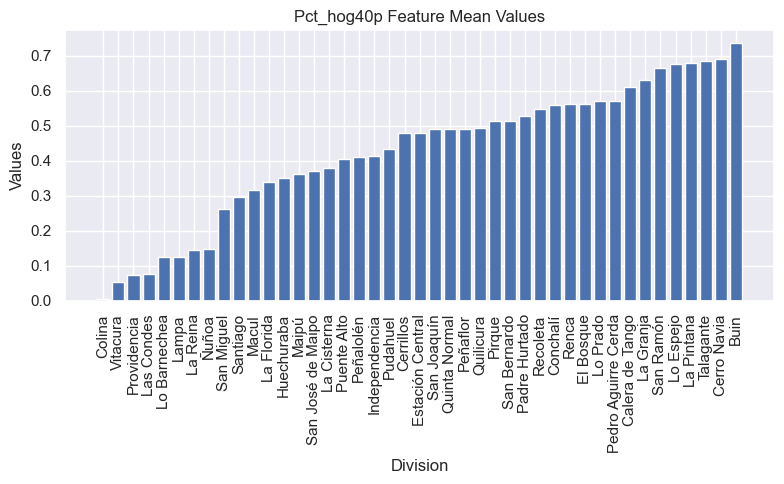

In [26]:
plot_features_mean("pct_hog40p", save_img=False)

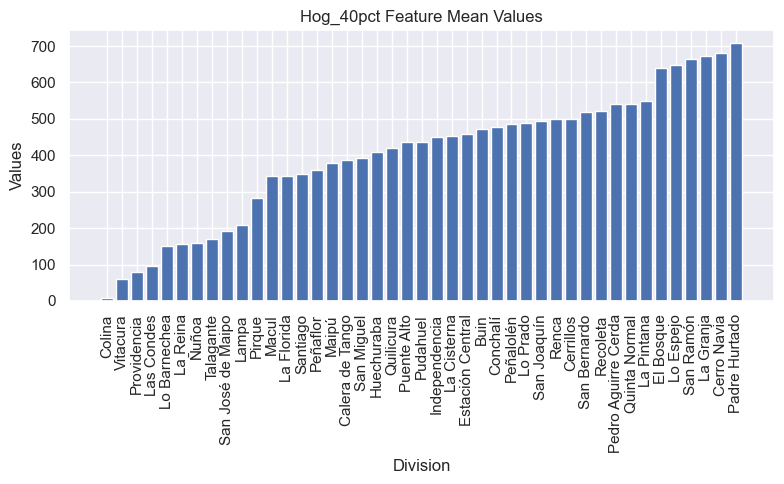

In [27]:
plot_features_mean("hog_40pct", save_img=False)